In [11]:
from sklearn import datasets

iris_data = datasets.load_iris()

# so iris_data is a dictionary which has 4 features in key = data and 3 kinds of iris flower in key = target
print('Features:\n',iris_data['data'][:10])
print('Labels:\n',iris_data['target'][:10])


Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels:
 [0 0 0 0 0 0 0 0 0 0]


In [12]:
from sklearn.cluster import AgglomerativeClustering

# Ward method
ward_m = AgglomerativeClustering(n_clusters = 3)
ward_pred = ward_m.fit_predict(iris_data.data)

# Complete method
complete_m = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
complete_pred = complete_m.fit_predict(iris_data.data)

# Average method
average_m = AgglomerativeClustering(linkage = 'average', n_clusters = 3)
average_pred = average_m.fit_predict(iris_data.data)


In [13]:
# Determine which is best using adjusted_rand_score from sklearn.metric

from sklearn.metrics import adjusted_rand_score

ward_score = adjusted_rand_score(iris_data.target, ward_pred)
complete_score = adjusted_rand_score(iris_data.target, complete_pred)
average_score = adjusted_rand_score(iris_data.target, average_pred)

print('ward score: {0} \ncomplete score: {1} \naverage score: {2}'.format(ward_score, complete_score, average_score))


ward score: 0.7311985567707745 
complete score: 0.64225125183629 
average score: 0.7591987071071522


In [14]:
# Normalizing all feature as 4th feature is on scale of 0-1
from sklearn import preprocessing
normalized_iris_data = preprocessing.normalize(iris_data.data)
normalized_iris_data[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [15]:
# Ward method
ward_m = AgglomerativeClustering(n_clusters = 3)
ward_pred = ward_m.fit_predict(normalized_iris_data)

# Complete method
complete_m = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
complete_pred = complete_m.fit_predict(normalized_iris_data)

# Average method
average_m = AgglomerativeClustering(linkage = 'average', n_clusters = 3)
average_pred = average_m.fit_predict(normalized_iris_data)

ward_score = adjusted_rand_score(iris_data.target, ward_pred)
complete_score = adjusted_rand_score(iris_data.target, complete_pred)
average_score = adjusted_rand_score(iris_data.target, average_pred)

print('ward score: {0} \ncomplete score: {1} \naverage score: {2}'.format(ward_score, complete_score, average_score))

ward score: 0.8856970310281228 
complete score: 0.644447235392006 
average score: 0.5583714437541352


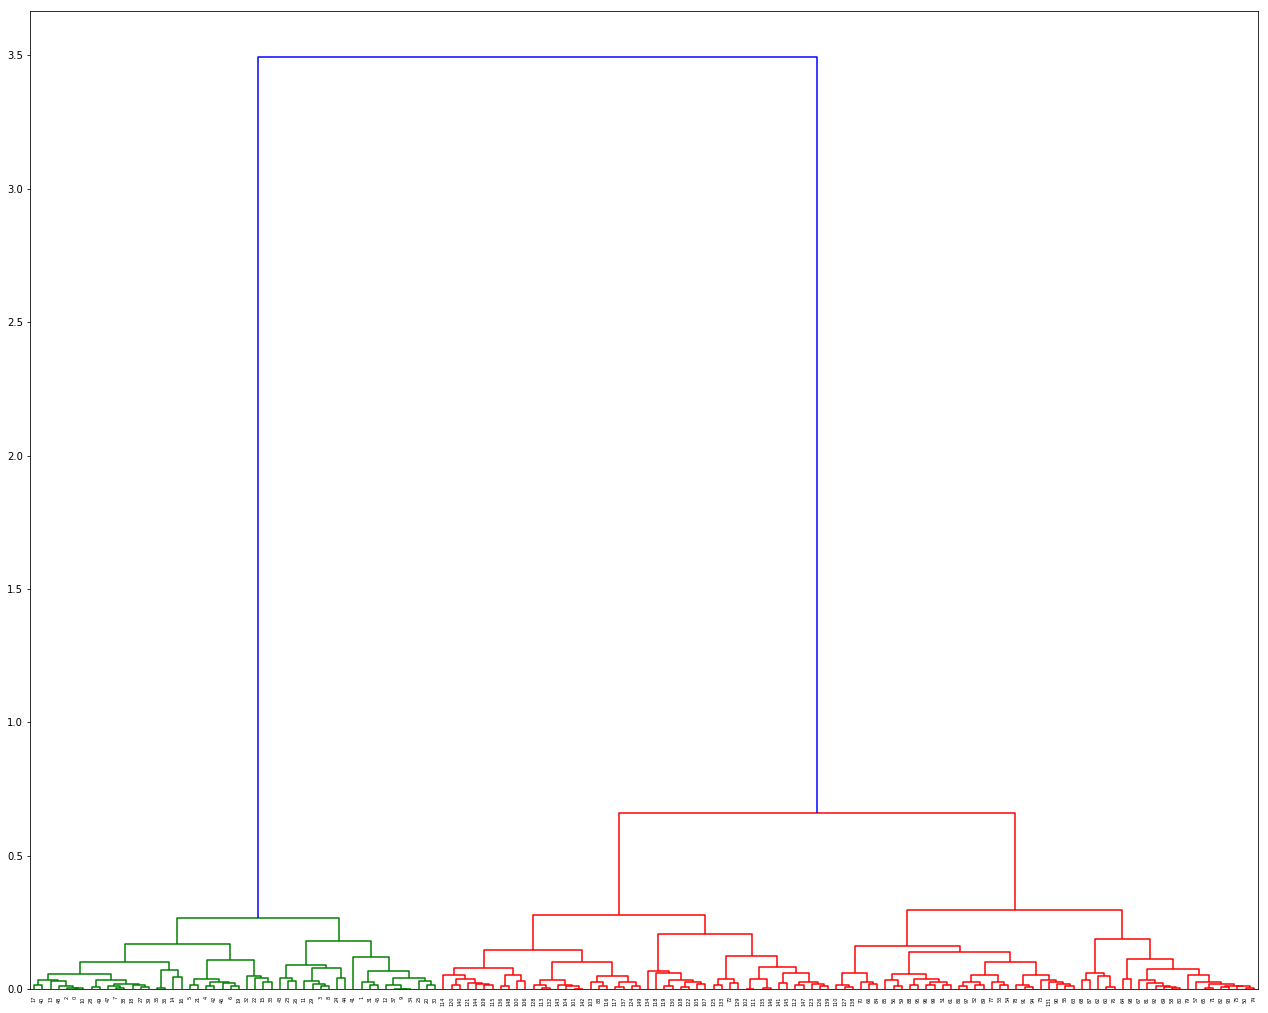

In [23]:
# Initially average algo was doing good now ward is doing better


# lets draw dendograms for this dataset
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



linkage_matrix = linkage(normalized_iris_data, 'ward')
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)
plt.show()

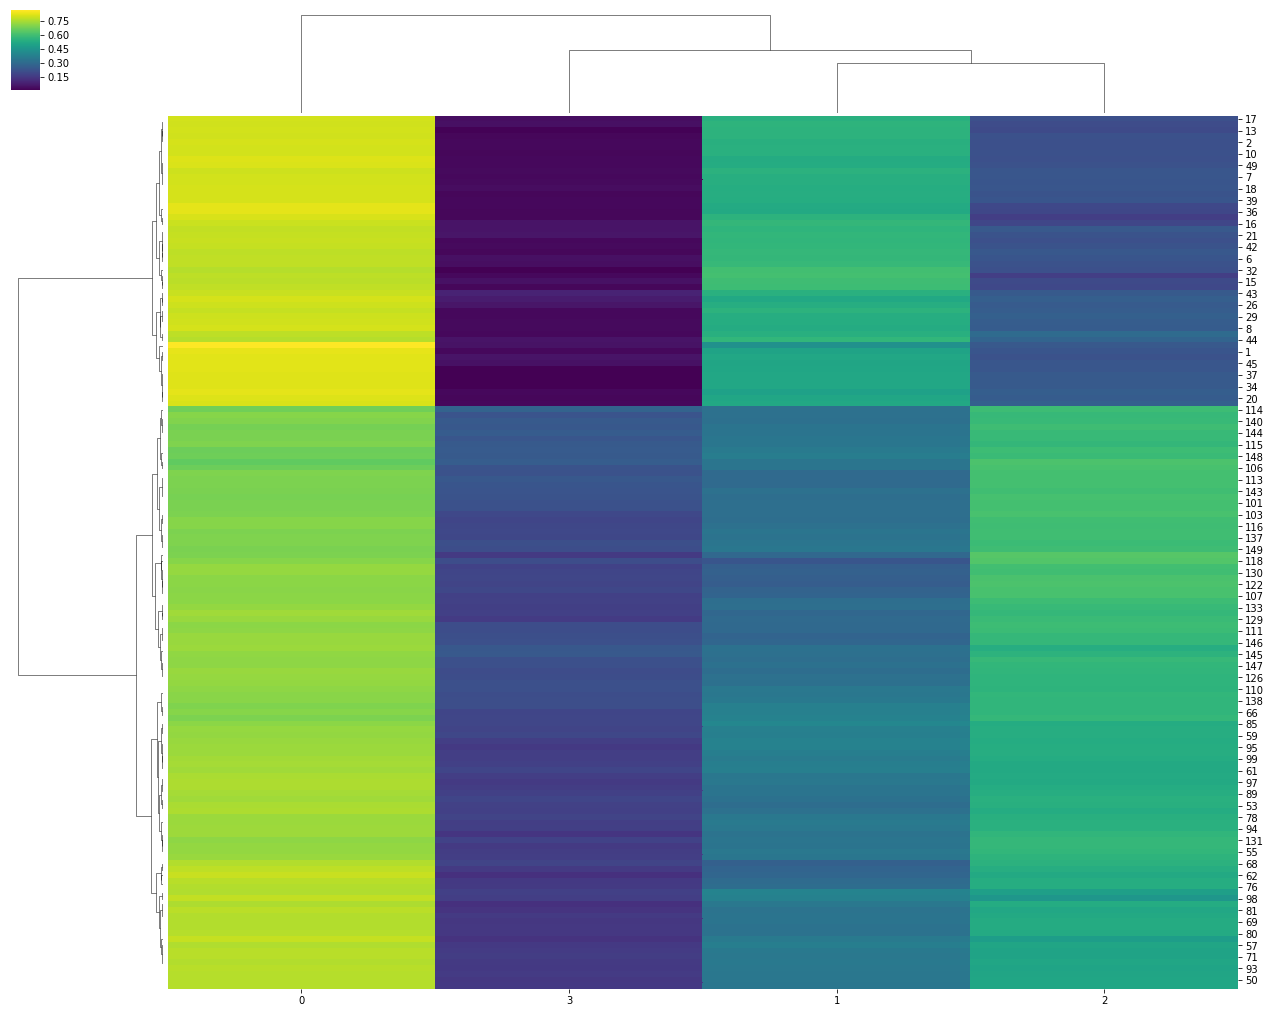

In [25]:
# seaborn can do all in one go with visualizaton of data also
import seaborn as sns

sns.clustermap(normalized_iris_data, figsize=(22,18), method = 'ward', cmap='viridis')
plt.show()